In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split

In [15]:
df = pd.read_excel('Data_Pure.xlsx')
df.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Output
0,807,317,163,178,80,65,0.112
1,875,346,164,173,79,60,0.420
2,837,331,173,188,87,69,0.687
3,710,293,167,184,87,70,0.869
4,646,270,169,191,93,76,0.952


In [0]:
X = df[['Input 1', 'Input 2', 'Input 3', 'Input 4', 'Input 5', 'Input 6']].values
y= df['Output'].values

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))#since knn is related to distance, it is good to normalize the data.
y=y.astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)#
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (93, 6) (93,)
Test set: (24, 6) (24,)


In [40]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
yhat = neigh.predict(X_test)
yhat


array([1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0])

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn import metrics
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("Train set Accuracy: ", r2_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", r2_score(y_test, yhat))

Train set Accuracy:  0.6795112781954888
Test set Accuracy:  0.6923076923076923


In [44]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9139784946236559
Test set Accuracy:  0.9166666666666666


In [47]:
Ks = 5
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.91666667, 0.95833333, 0.875     , 0.95833333])

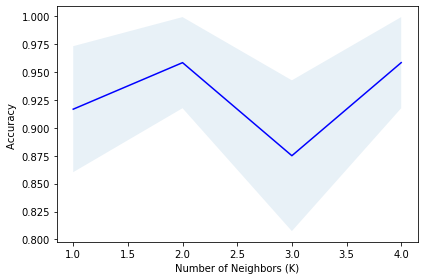

In [48]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [0]:
#error for different k's
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [0]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')